In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
pd.options.mode.chained_assignment = None
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('test.csv')

In [3]:
df1=pd.read_csv('train.csv')

In [4]:
df.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number
0,A723133,2013,3,3 years,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Female,...,1095,3.000000,"(2.5, 5.0]",01-04-2016 16:19,4,2016,2016-04,Friday,16,1
1,A723134,2016,2,4 weeks,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Female,...,60,0.164384,"(-0.025, 2.5]",30-04-2016 17:42,4,2016,2016-04,Saturday,17,1
2,A723135,2016,2,4 weeks,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Male,...,60,0.164384,"(-0.025, 2.5]",29-04-2016 00:00,4,2016,2016-04,Friday,0,1
3,A723136,2016,2,4 weeks,Cat,Domestic Shorthair Mix,Brown Tabby,Nursing,Stray,Intact Female,...,30,0.082192,"(-0.025, 2.5]",27-04-2016 13:47,4,2016,2016-04,Wednesday,13,1
4,A723137,2016,2,4 weeks,Cat,Domestic Shorthair Mix,Blue Tabby,Nursing,Stray,Intact Female,...,60,0.164384,"(-0.025, 2.5]",03-05-2016 11:42,5,2016,2016-05,Tuesday,11,1


In [5]:
df1.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,...,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,Return to Owner
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,...,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,Missing
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,...,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,Return to Owner


In [6]:
df1.tail()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
47798,A723128,2007,9,8 years,Cat,Domestic Longhair Mix,Black/White,Normal,Stray,Neutered Male,...,8.0,"(7.5, 10.0]",2016-04-18 00:00:00,4,2016,2016-04,Monday,0,1.0,Rto-Adopt
47799,A723129,2015,3,1 year,Dog,Cairn Terrier Mix,Gray/White,Normal,Owner Surrender,Intact Male,...,1.0,"(-0.025, 2.5]",NaN,3,2016,2016-03,Tuesday,19,1.0,Adoption
47800,A723130,2005,3,11 years,Dog,Shetland Sheepdog Mix,Brown/Tan,Normal,Stray,Spayed Female,...,11.0,"(10.0, 12.5]",2016-03-27 17:07:00,3,2016,2016-03,Sunday,17,1.0,Return to Owner
47801,A723131,2011,3,5 years,Dog,Boxer/Catahoula,Brown Brindle/White,Normal,Stray,Intact Male,...,5.0,"(2.5, 5.0]",2016-04-09 13:37:00,4,2016,2016-04,Saturday,13,1.0,Adoption
47802,A723132,2015,3,1 year,Other,Opossum,Gray,Injured,Wildlife,Unknown,...,1.0,"(-0.025, 2.5]",NaN,3,2016,2016-03,Sunday,12,1.0,Euthanasia


In [7]:
df.isnull().sum()

animal_id_outcome             0
dob_year                      0
dob_month                     0
age_upon_intake               0
animal_type                   0
breed                         0
color                         0
intake_condition              0
intake_type                   0
sex_upon_intake               0
count                         0
age_upon_intake_(days)        0
age_upon_intake_(years)       0
age_upon_intake_age_group     0
intake_datetime               0
intake_month                  0
intake_year                   0
intake_monthyear              0
intake_weekday                0
intake_hour                   0
intake_number                 0
time_in_shelter               0
time_in_shelter_days          0
age_upon_outcome              0
date_of_birth                 0
sex_upon_outcome              0
age_upon_outcome_(days)       0
age_upon_outcome_(years)      0
age_upon_outcome_age_group    0
outcome_datetime              0
outcome_month                 0
outcome_

In [8]:
df1.isnull().sum()

animal_id_outcome                0
dob_year                         0
dob_month                        0
age_upon_intake                  0
animal_type                      0
breed                            0
color                            0
intake_condition                 0
intake_type                      0
sex_upon_intake                  1
count                            0
age_upon_intake_(days)           0
age_upon_intake_(years)          0
age_upon_intake_age_group        0
intake_datetime                  0
intake_month                     0
intake_year                      0
intake_monthyear                 0
intake_weekday                   0
intake_hour                      0
intake_number                    0
time_in_shelter                  0
time_in_shelter_days             0
age_upon_outcome                 0
date_of_birth                    0
sex_upon_outcome                 1
age_upon_outcome_(days)          0
age_upon_outcome_(years)         0
age_upon_outcome_age

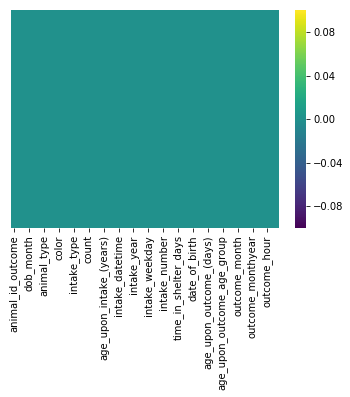

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

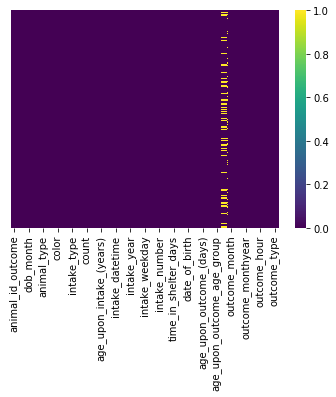

In [10]:
sns.heatmap(df1.isnull(),yticklabels=False,cmap='viridis')

In [11]:
df.shape

(31869, 36)

In [12]:
df1.shape

(47803, 37)

In [13]:
df.columns

Index(['animal_id_outcome', 'dob_year', 'dob_month', 'age_upon_intake',
       'animal_type', 'breed', 'color', 'intake_condition', 'intake_type',
       'sex_upon_intake', 'count', 'age_upon_intake_(days)',
       'age_upon_intake_(years)', 'age_upon_intake_age_group',
       'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear',
       'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter',
       'time_in_shelter_days', 'age_upon_outcome', 'date_of_birth',
       'sex_upon_outcome', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_datetime', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number'],
      dtype='object')

In [14]:
df1.columns

Index(['animal_id_outcome', 'dob_year', 'dob_month', 'age_upon_intake',
       'animal_type', 'breed', 'color', 'intake_condition', 'intake_type',
       'sex_upon_intake', 'count', 'age_upon_intake_(days)',
       'age_upon_intake_(years)', 'age_upon_intake_age_group',
       'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear',
       'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter',
       'time_in_shelter_days', 'age_upon_outcome', 'date_of_birth',
       'sex_upon_outcome', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_datetime', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'outcome_type'],
      dtype='object')

In [15]:
sns.set_style('whitegrid')

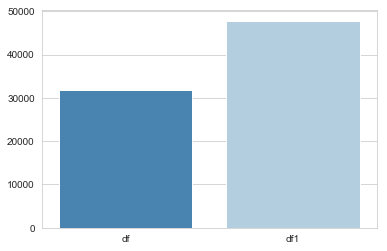

In [16]:
sns.barplot(x=['df', 'df1'], y=[len(df), len(df1)], palette="Blues_r")

In [17]:
AnimalTypeGroup = df.groupby('animal_type')
print(AnimalTypeGroup.animal_type.value_counts())
AnimalTypeGroup.outcome_number.value_counts()

animal_type  animal_type
Bird         Bird             167
Cat          Cat            12588
Dog          Dog            17144
Other        Other           1970
Name: animal_type, dtype: int64


animal_type  outcome_number
Bird         1                   167
Cat          1                 12124
             2                   426
             3                    36
             4                     2
Dog          1                 15049
             2                  1662
             3                   327
             4                    74
             5                    21
             6                     7
             7                     3
             8                     1
Other        1                  1962
             2                     8
Name: outcome_number, dtype: int64

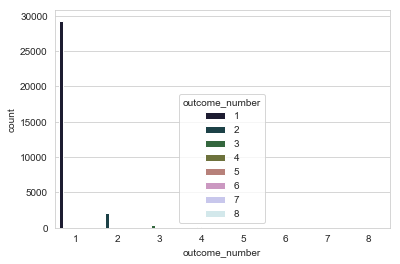

In [18]:
sns.countplot(x="outcome_number",hue="outcome_number",data=df,palette='cubehelix')

In [32]:
df1['outcome_weekday'].unique()

array(['Thursday', 'Saturday', 'Monday', 'Sunday', 'Friday', 'Tuesday',
       'Wednesday'], dtype=object)

In [34]:
outcome_w={
    'Thursday':4, 'Saturday':6, 'Monday':1, 'Sunday':7, 'Friday':5, 'Tuesday':2,
       'Wednesday':3,
    
    
}
df1['outcome_wd']=df1['outcome_weekday'].map(outcome_w)
df1.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_ty,outcome_wd
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,...,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,1,4
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,1,6
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,1,6
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,...,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,2,1
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,...,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,1,6


In [35]:
df1.drop('outcome_weekday',inplace=True,axis=1)
df1.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_hour,outcome_number,outcome_ty,outcome_wd
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,...,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,0,1.0,1,4
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,16,2.0,1,6
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,17,3.0,1,6
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,...,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,15,1.0,2,1
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,...,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,11,1.0,1,6


In [19]:
df1['outcome_type'].unique()

array(['Return to Owner', 'Missing', 'Transfer', 'Adoption', 'Euthanasia',
       'Rto-Adopt', 'Relocate', 'Died', 'Disposal'], dtype=object)

In [20]:
outcome_t={
    'Return to Owner':1, 'Missing':2, 'Transfer':3, 'Adoption':4, 'Euthanasia':5,
       'Rto-Adopt':6, 'Relocate':7, 'Died':8, 'Disposal':9,
    
    
}
df1['outcome_ty']=df1['outcome_type'].map(outcome_t)
df1.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type,outcome_ty
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,...,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,Return to Owner,1
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,Return to Owner,1
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,Return to Owner,1
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,...,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,Missing,2
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,...,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,Return to Owner,1


In [21]:
df1.drop('outcome_type',inplace=True,axis=1)

In [22]:
df1.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_ty
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,...,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,1
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,1
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,Saturday,17,3.0,1
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,...,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,2
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,...,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,1


In [46]:
df1.drop('age_upon_intake',inplace=True,axis=1)

In [47]:
df1['animal_type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird'], dtype=object)

In [48]:
outcome_a={
    'Dog':1, 'Cat':2, 'Other':3, 'Bird':4,
    
    
}
df1['outcome_at']=df1['animal_type'].map(outcome_a)
df1.head()

,animal_id_outcome,dob_year,dob_month,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,count,...,age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_hour,outcome_number,outcome_ty,outcome_wd,outcome_at
0,A006100,2007,7,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,1,...,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,0,1.0,1,4,1
1,A006100,2007,7,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,...,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,16,2.0,1,6,1
2,A006100,2007,7,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,1,...,"(5.0, 7.5]",NaN,3,2014,2014-03,17,3.0,1,6,1
3,A047759,2004,4,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,1,...,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,15,1.0,2,1,1
4,A134067,1997,10,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,1,...,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,11,1.0,1,6,1


In [49]:
df1.drop('animal_type',inplace=True,axis=1)

In [50]:
df1['breed'].unique()

array(['Spinone Italiano Mix', 'Dachshund', 'Shetland Sheepdog', ...,
       'Dachshund/Pomeranian', 'Rhod Ridgeback/Chow Chow',
       'Mastiff/Bloodhound'], dtype=object)

In [52]:
outcome_b={
    'Spinone Italiano Mix':1, 'Dachshund':2, 'Shetland Sheepdog':3,
       'Dachshund/Pomeranian':4, 'Rhod Ridgeback/Chow Chow':5,
       'Mastiff/Bloodhound':6,
    
    
}
df1['outcome_bt']=df1['breed'].map(outcome_b)
df1.drop('breed',inplace=True,axis=1)
df1.head()

,animal_id_outcome,dob_year,dob_month,color,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),...,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_hour,outcome_number,outcome_ty,outcome_wd,outcome_at,outcome_bt
0,A006100,2007,7,Yellow/White,Normal,Stray,Neutered Male,1,3650,10.0,...,2017-12-07 14:07:00,12,2017,2017-12,0,1.0,1,4,1,1.0
1,A006100,2007,7,Yellow/White,Normal,Public Assist,Neutered Male,1,2555,7.0,...,2014-12-20 16:35:00,12,2014,2014-12,16,2.0,1,6,1,1.0
2,A006100,2007,7,Yellow/White,Normal,Public Assist,Neutered Male,1,2190,6.0,...,NaN,3,2014,2014-03,17,3.0,1,6,1,1.0
3,A047759,2004,4,Tricolor,Normal,Owner Surrender,Neutered Male,1,3650,10.0,...,2014-04-07 15:12:00,4,2014,2014-04,15,1.0,2,1,1,2.0
4,A134067,1997,10,Brown/White,Injured,Public Assist,Neutered Male,1,5840,16.0,...,2013-11-16 11:54:00,11,2013,2013-11,11,1.0,1,6,1,3.0


In [54]:
df1['color'].unique()


array(['Yellow/White', 'Tricolor', 'Brown/White', 'Black/White',
       'Black/Gray', 'White/Black', 'Brown Tabby/White', 'Black/Tan',
       'Tan/Black', 'Black', 'Gold/Gold', 'Sable/White', 'Blue Merle/Tan',
       'Blue Merle', 'Brown/Black', 'Black/Tricolor', 'Gray/White',
       'Black/Black', 'Tan', 'Black/Brown', 'Cream', 'Red', 'Yellow',
       'Gray Tabby/White', 'Brown Merle', 'White', 'White/Brown',
       'Tortie', 'White/Gray Tabby', 'Black/Brown Brindle',
       'Black Smoke/White', 'Brown/Tan', 'Orange Tabby/White',
       'Blue Cream/Tortie', 'Lynx Point', 'Brown/Buff', 'Red Merle',
       'Calico', 'Brown', 'Brown/Cream', 'Blue/White', 'Red/White',
       'Tan/White', 'Lilac Point', 'Gold', 'Brown Tabby', 'Red/Black',
       'Black Brindle', 'Brown/Blue Merle', 'Blue', 'Red/Tan',
       'Black/Red', 'Chocolate', 'Brown Tabby/Agouti', 'Blue Point',
       'Silver Tabby', 'Brown Brindle/White', 'Cream/White',
       'Blue Merle/White', 'White/Liver', 'White/Cream', 'Blue

In [36]:
corrMatrix=df1.corr()

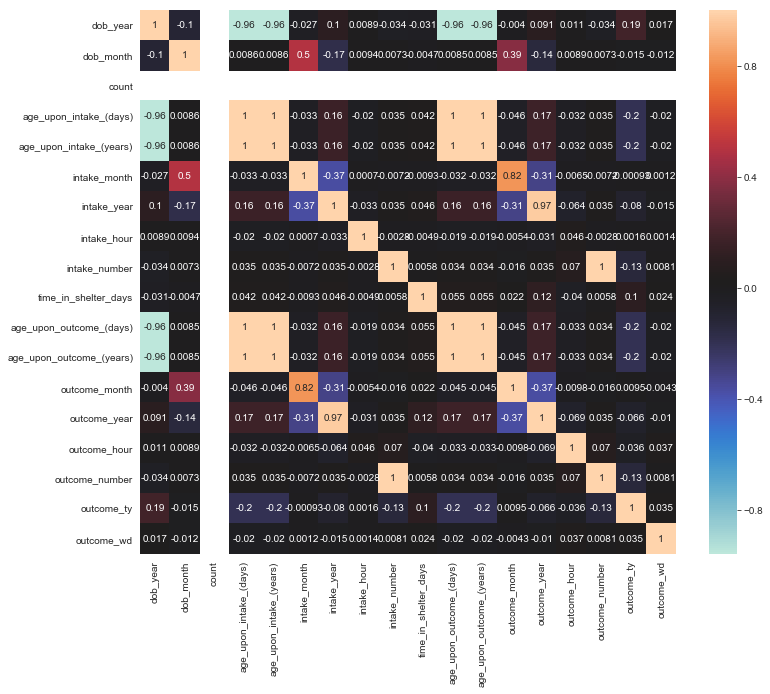

In [37]:
f,ax=plt.subplots(figsize=(12,10))
ax=sns.heatmap(corrMatrix,annot=True,cmap='icefire')

In [38]:
x=['animal_id_outcome', 'dob_year', 'dob_month', 'age_upon_intake',
       'animal_type', 'breed', 'color', 'intake_condition', 'intake_type',
       'sex_upon_intake', 'count', 'age_upon_intake_(days)',
       'age_upon_intake_(years)', 'age_upon_intake_age_group',
       'intake_datetime', 'intake_month', 'intake_year', 'intake_monthyear',
       'intake_weekday', 'intake_hour', 'intake_number', 'time_in_shelter',
       'time_in_shelter_days', 'age_upon_outcome', 'date_of_birth',
       'sex_upon_outcome', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_datetime', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number']

In [39]:
y=['outcome_ty']

In [40]:
df2=pd.DataFrame(data=df1)
df2.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_hour,outcome_number,outcome_ty,outcome_wd
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,...,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,0,1.0,1,4
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,16,2.0,1,6
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,6.0,"(5.0, 7.5]",NaN,3,2014,2014-03,17,3.0,1,6
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,...,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,15,1.0,2,1
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,...,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,11,1.0,1,6


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1.drop('outcome_ty',axis=1),df1['outcome_ty'],test_size=0.20,random_state=101)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
LRModel=LogisticRegression()

In [44]:
LRModel.fit(X_train,y_train)

ValueError: could not convert string to float: '2016-02'